In [1]:
import os
import glob
import numpy as np
import pandas as pd
import copy
import mne

In [5]:
df_localization = pd.read_csv('/Volumes/Nexus/Users/zouj/sEEG_data/electrode-localizations.tsv', delimiter='\t')

In [3]:
df_localization.groupby('Subject').count()

,label,mni_linear_x,mni_linear_y,mni_linear_z,HCPMMP1_label_1,HCPMMP1_weight_1,HCPMMP1_label_2,HCPMMP1_weight_2,MOREL_label_1,MOREL_weight_1,...,DISTAL_label_1,DISTAL_weight_1,DISTAL_label_2,DISTAL_weight_2,interictal_activity,ictal_activity,electrode,is_thalamic,is_cortical,loc_code
Subject,,,,,,,,,,,,,,,,,,,,,
EM1002,32,32,32,32,13,32,12,32,14,32,...,25,32,21,32,32,32,32,32,32,32
EM1021,32,32,32,32,12,32,11,32,15,32,...,16,32,16,32,32,32,32,32,32,32
EM1023,46,46,46,46,29,46,28,46,15,46,...,20,46,19,46,0,0,46,46,46,46
EM1029,44,44,44,44,28,44,28,44,13,44,...,18,44,18,44,44,44,44,44,44,44
EM1035,32,32,32,32,15,32,13,32,13,32,...,24,32,19,32,32,32,32,32,32,32
EM1061,42,42,42,42,28,42,25,42,11,42,...,26,42,19,42,0,0,42,42,42,42
EM1063,32,32,32,32,19,32,19,32,8,32,...,18,32,10,32,0,0,32,32,32,32
EM1066,34,34,34,34,18,34,17,34,16,34,...,20,34,18,34,0,0,34,34,34,34


# sub-EM1002
stim in the middle of recording? --> cropping into two 

In [6]:
glob.glob('/Volumes/Nexus/sEEG/*1002*/*.edf')

['/Volumes/Nexus/sEEG/sub-EM1002/EM1002_ses-EMU_task-resting_run-1.edf']

In [61]:
subj1002_raw = mne.io.read_raw_edf('/Volumes/Nexus/sEEG/sub-EM1002/EM1002_ses-EMU_task-resting_run-1.edf')

Extracting EDF parameters from /Volumes/Nexus/sEEG/sub-EM1002/EM1002_ses-EMU_task-resting_run-1.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...


In [5]:
subj1002_raw 

<RawEDF | EM1002_ses-EMU_task-resting_run-1.edf, 32 x 614400 (600.0 s), ~29 kB, data not loaded>

In [111]:
subj1002_raw.plot()

Using pyopengl with version 3.1.7


<mne_qt_browser._pg_figure.MNEQtBrowser(0x2a6a85bc0) at 0x2b22b34c0>

qt.pointer.dispatch: skipping QEventPoint(id=1 ts=0 pos=0,0 scn=478.25,659.093 gbl=478.25,659.093 Released ellipse=(1x1 ∡ 0) vel=0,0 press=-478.25,-659.093 last=-478.25,-659.093 Δ 478.25,659.093) : no target window
qt.pointer.dispatch: skipping QEventPoint(id=2 ts=0 pos=0,0 scn=629.378,503.644 gbl=629.378,503.644 Released ellipse=(1x1 ∡ 0) vel=0,0 press=-629.378,-503.644 last=-629.378,-503.644 Δ 629.378,503.644) : no target window
qt.pointer.dispatch: skipping QEventPoint(id=3 ts=0 pos=0,0 scn=871.481,606.244 gbl=871.481,606.244 Released ellipse=(1x1 ∡ 0) vel=0,0 press=-871.481,-606.244 last=-871.481,-606.244 Δ 871.481,606.244) : no target window
qt.pointer.dispatch: skipping QEventPoint(id=11 ts=0 pos=0,0 scn=-45.005,691.086 gbl=-45.005,691.086 Released ellipse=(1x1 ∡ 0) vel=0,0 press=45.005,-691.086 last=45.005,-691.086 Δ -45.005,691.086) : no target window
qt.pointer.dispatch: skipping QEventPoint(id=12 ts=0 pos=0,0 scn=175.677,745.806 gbl=175.677,745.806 Released ellipse=(1x1 ∡ 0) 

Channels marked as bad:
none
Channels marked as bad:
['RCM16']


In [44]:
subj1002_raw.copy().crop(tmax = 152).export(
    '/Volumes/Nexus/sEEG/sub-EM1002/EM1002_ses-EMU_task-resting_run-1_1.edf',
    overwrite = True
)

subj1002_raw.copy().crop(tmin = 204).export(
    '/Volumes/Nexus/sEEG/sub-EM1002/EM1002_ses-EMU_task-resting_run-1_2.edf',
    overwrite = True
)


Overwriting existing file.


/var/folders/3b/c572vxrx1rddt5284f3d5zh80000gn/T/ipykernel_5307/1328088409.py:1: RuntimeWarning: EDF format requires equal-length data blocks, so 0.9990234375 seconds of zeros were appended to all channels when writing the final block.
  subj1002_raw.copy().crop(tmax = 152).export(


Overwriting existing file.


# sub-EM1021
some sEEG channels are removed (check with vitek)

In [13]:
glob.glob('/Volumes/Nexus/sEEG/*1021*/*.edf')

['/Volumes/Nexus/sEEG/sub-EM1021/sub-EM1021_session-EMU_task-resting_run-01.edf',
 '/Volumes/Nexus/sEEG/sub-EM1021/sub-EM1021_session-EMU_task-resting_run-02.edf',
 '/Volumes/Nexus/sEEG/sub-EM1021/sub-EM1021_session-EMU_task-resting_run-03.edf']

In [14]:
subj1021_raw1 = mne.io.read_raw_edf('/Volumes/Nexus/sEEG/sub-EM1021/sub-EM1021_session-EMU_task-resting_run-01.edf')
subj1021_raw2 = mne.io.read_raw_edf('/Volumes/Nexus/sEEG/sub-EM1021/sub-EM1021_session-EMU_task-resting_run-02.edf')
subj1021_raw3 = mne.io.read_raw_edf('/Volumes/Nexus/sEEG/sub-EM1021/sub-EM1021_session-EMU_task-resting_run-03.edf')

Extracting EDF parameters from /Volumes/Nexus/sEEG/sub-EM1021/sub-EM1021_session-EMU_task-resting_run-01.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Extracting EDF parameters from /Volumes/Nexus/sEEG/sub-EM1021/sub-EM1021_session-EMU_task-resting_run-02.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Extracting EDF parameters from /Volumes/Nexus/sEEG/sub-EM1021/sub-EM1021_session-EMU_task-resting_run-03.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...


In [90]:
subj1021_raw2

<RawEDF | sub-EM1021_session-EMU_task-resting_run-02.edf, 18 x 249664 (243.8 s), ~19 kB, data not loaded>

In [18]:
subj1021_raw3.plot()

Using qt as 2D backend.
Using pyopengl with version 3.1.7


<mne_qt_browser._pg_figure.MNEQtBrowser(0x29ddaff80) at 0x29d59cb40>

qt.pointer.dispatch: skipping QEventPoint(id=1 ts=0 pos=0,0 scn=537.631,620.598 gbl=537.631,620.598 Released ellipse=(1x1 ∡ 0) vel=0,0 press=-537.631,-620.598 last=-537.631,-620.598 Δ 537.631,620.598) : no target window
qt.pointer.dispatch: skipping QEventPoint(id=3 ts=0 pos=0,0 scn=-25.212,664.389 gbl=-25.212,664.389 Released ellipse=(1x1 ∡ 0) vel=0,0 press=25.212,-664.389 last=25.212,-664.389 Δ -25.212,664.389) : no target window
qt.pointer.dispatch: skipping QEventPoint(id=1 ts=0 pos=0,0 scn=373.224,756.744 gbl=373.224,756.744 Released ellipse=(1x1 ∡ 0) vel=0,0 press=-373.224,-756.744 last=-373.224,-756.744 Δ 373.224,756.744) : no target window
qt.pointer.dispatch: skipping QEventPoint(id=1 ts=0 pos=0,0 scn=1354.02,725.622 gbl=1354.02,725.622 Released ellipse=(1x1 ∡ 0) vel=0,0 press=-1354.02,-725.622 last=-1354.02,-725.622 Δ 1354.02,725.622) : no target window
qt.pointer.dispatch: skipping QEventPoint(id=2 ts=0 pos=0,0 scn=1529.52,899.502 gbl=1529.52,899.502 Released ellipse=(1x1 ∡ 

Channels marked as bad:
none


# sub-EM1023
in run 2 there are non sEEG channels

In [44]:
glob.glob('/Volumes/Nexus/sEEG/*1023*/*.edf')

['/Volumes/Nexus/sEEG/sub-EM1023/sub-EM1023_ses-EMU_task-resting_run-02.edf',
 '/Volumes/Nexus/sEEG/sub-EM1023/sub-EM1023_ses-EMU_task-resting_run-01.edf']

In [19]:
subj1023_raw1 = mne.io.read_raw_edf('/Volumes/Nexus/sEEG/sub-EM1023/sub-EM1023_ses-EMU_task-resting_run-01.edf')
subj1023_raw2 = mne.io.read_raw_edf('/Volumes/Nexus/sEEG/sub-EM1023/sub-EM1023_ses-EMU_task-resting_run-02.edf')

Extracting EDF parameters from /Volumes/Nexus/sEEG/sub-EM1023/sub-EM1023_ses-EMU_task-resting_run-01.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Extracting EDF parameters from /Volumes/Nexus/sEEG/sub-EM1023/sub-EM1023_ses-EMU_task-resting_run-02.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...


In [87]:
subj1023_raw1

<RawEDF | sub-EM1023_ses-EMU_task-resting_run-01.edf, 46 x 614464 (600.1 s), ~40 kB, data not loaded>

In [21]:
subj1023_raw2

<RawEDF | sub-EM1023_ses-EMU_task-resting_run-02.edf, 276 x 570048 (556.7 s), ~213 kB, data not loaded>

In [79]:
subj1023_ch = list(df_localization.query("Subject == 'EM1023'")['label'])

In [81]:
subj1023_raw2.copy().pick(subj1023_ch)

<RawEDF | sub-EM1023_ses-EMU_task-resting_run-02.edf, 46 x 570048 (556.7 s), ~40 kB, data not loaded>

# sub-EM1029
non sEEG channels

In [22]:
glob.glob('/Volumes/Nexus/sEEG/*1029*/*.edf')

['/Volumes/Nexus/sEEG/sub-EM1029/sub-EM1029_ses-EMU_task-resting_run-01.edf']

In [12]:
subj1029_raw1 = mne.io.read_raw_edf('/Volumes/Nexus/sEEG/sub-EM1029/sub-EM1029_ses-EMU_task-resting_run-01.edf')

Extracting EDF parameters from /Volumes/Nexus/sEEG/sub-EM1029/sub-EM1029_ses-EMU_task-resting_run-01.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...


In [25]:
subj1029_raw1

<RawEDF | sub-EM1029_ses-EMU_task-resting_run-01.edf, 60 x 614400 (600.0 s), ~50 kB, data not loaded>

In [93]:
subj1029_raw1.plot()

Using pyopengl with version 3.1.7


<mne_qt_browser._pg_figure.MNEQtBrowser(0x2a20ba070) at 0x28bf2a540>

qt.pointer.dispatch: skipping QEventPoint(id=0 ts=0 pos=0,0 scn=1460.71,767.785 gbl=1460.71,767.785 Released ellipse=(1x1 ∡ 0) vel=0,0 press=-1460.71,-767.785 last=-1460.71,-767.785 Δ 1460.71,767.785) : no target window
qt.pointer.dispatch: skipping QEventPoint(id=1 ts=0 pos=0,0 scn=1380.61,764.725 gbl=1380.61,764.725 Released ellipse=(1x1 ∡ 0) vel=0,0 press=-1380.61,-764.725 last=-1380.61,-764.725 Δ 1380.61,764.725) : no target window
qt.pointer.dispatch: skipping QEventPoint(id=1 ts=0 pos=0,0 scn=1092.44,679.674 gbl=1092.44,679.674 Released ellipse=(1x1 ∡ 0) vel=0,0 press=-1092.44,-679.674 last=-1092.44,-679.674 Δ 1092.44,679.674) : no target window
qt.pointer.dispatch: skipping QEventPoint(id=1 ts=0 pos=0,0 scn=956.5,858.827 gbl=956.5,858.827 Released ellipse=(1x1 ∡ 0) vel=0,0 press=-956.5,-858.827 last=-956.5,-858.827 Δ 956.5,858.827) : no target window


In [13]:
subj1029_preprocessed1 = mne.io.read_raw_edf(
    '/Volumes/Nexus/Users/zouj/sEEG_data/preprocessed/sub-EM1029_ses-EMU_task-resting_run-01.edf'
    )

Extracting EDF parameters from /Volumes/Nexus/Users/zouj/sEEG_data/preprocessed/sub-EM1029_ses-EMU_task-resting_run-01.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...


In [14]:
subj1029_preprocessed1.plot()

Using pyopengl with version 3.1.7


<mne_qt_browser._pg_figure.MNEQtBrowser(0x295a9ae50) at 0x29f331800>

qt.pointer.dispatch: skipping QEventPoint(id=0 ts=0 pos=0,0 scn=186.611,303.092 gbl=186.611,303.092 Released ellipse=(1x1 ∡ 0) vel=0,0 press=-186.611,-303.092 last=-186.611,-303.092 Δ 186.611,303.092) : no target window
qt.pointer.dispatch: skipping QEventPoint(id=1 ts=0 pos=0,0 scn=152.053,313.172 gbl=152.053,313.172 Released ellipse=(1x1 ∡ 0) vel=0,0 press=-152.053,-313.172 last=-152.053,-313.172 Δ 152.053,313.172) : no target window
qt.pointer.dispatch: skipping QEventPoint(id=1 ts=0 pos=0,0 scn=346.225,759.407 gbl=346.225,759.407 Released ellipse=(1x1 ∡ 0) vel=0,0 press=-346.225,-759.407 last=-346.225,-759.407 Δ 346.225,759.407) : no target window
qt.pointer.dispatch: skipping QEventPoint(id=1 ts=0 pos=0,0 scn=288.365,835.593 gbl=288.365,835.593 Released ellipse=(1x1 ∡ 0) vel=0,0 press=-288.365,-835.593 last=-288.365,-835.593 Δ 288.365,835.593) : no target window
qt.pointer.dispatch: skipping QEventPoint(id=1 ts=0 pos=0,0 scn=155.233,639.483 gbl=155.233,639.483 Released ellipse=(1x

Effective window size : 2.000 (s)


/var/folders/3b/c572vxrx1rddt5284f3d5zh80000gn/T/ipykernel_43060/1112540063.py:1: RuntimeWarning: Channel locations not available. Disabling spatial colors.
  subj1029_preprocessed1.copy().pick(['LCM2', 'LCM4']).compute_psd(fmin = 1, fmax = 100).plot()
/Users/jasminezou/Projects/mne-python/mne/viz/utils.py:151: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  (fig or plt).show(**kwargs)


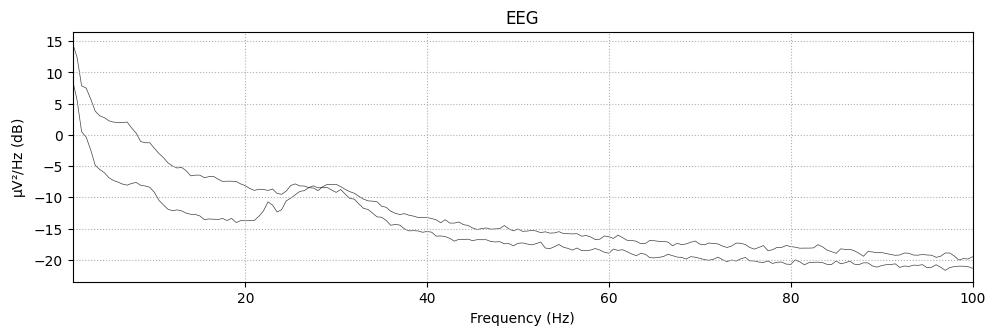

In [18]:
subj1029_preprocessed1.copy().pick(['LCM2', 'LCM4']).compute_psd(fmin = 1, fmax = 100).plot()

Effective window size : 2.000 (s)


/var/folders/3b/c572vxrx1rddt5284f3d5zh80000gn/T/ipykernel_43060/397653342.py:1: RuntimeWarning: Channel locations not available. Disabling spatial colors.
  subj1029_preprocessed1.copy().pick(['LCM2', 'LCM4']).compute_psd(fmin = 1, fmax = 100).plot(xscale = 'log')
/Users/jasminezou/Projects/mne-python/mne/viz/utils.py:151: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  (fig or plt).show(**kwargs)


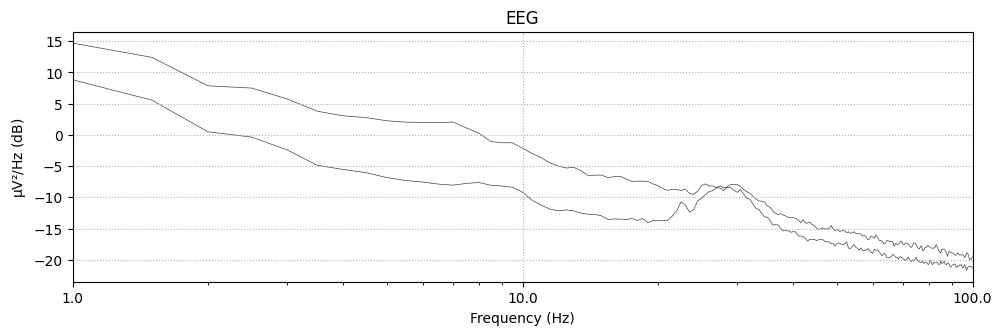

In [19]:
subj1029_preprocessed1.copy().pick(['LCM2', 'LCM4']).compute_psd(fmin = 1, fmax = 100).plot(xscale = 'log')

Effective window size : 2.000 (s)
Need more than one channel to make topography for eeg. Disabling interactivity.


/var/folders/3b/c572vxrx1rddt5284f3d5zh80000gn/T/ipykernel_57070/2451904872.py:1: RuntimeWarning: Channel locations not available. Disabling spatial colors.
  subj1029_raw1.pick(['RCM16']).compute_psd().plot()
/Users/jasminezou/Projects/mne-python/mne/viz/utils.py:151: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  (fig or plt).show(**kwargs)


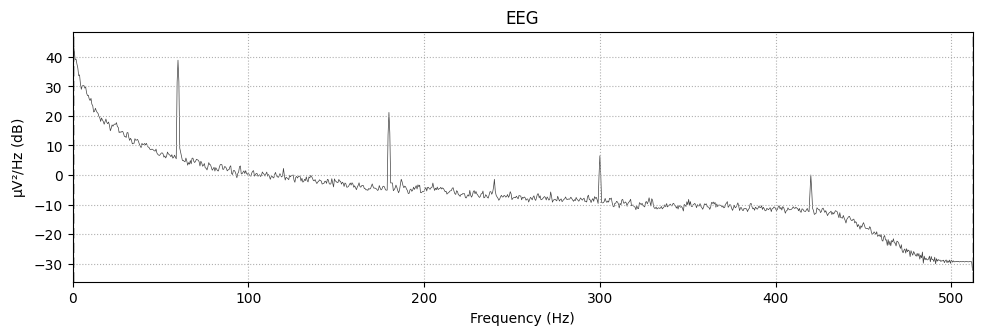

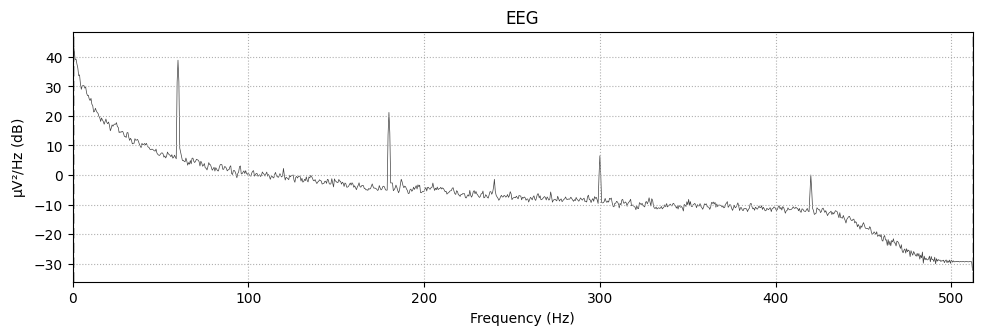

In [30]:
subj1029_raw1.pick(['RCM16']).compute_psd().plot()

# sub-EM1035

In [3]:
glob.glob('/Volumes/Nexus/sEEG/*1035*/*.edf')

['/Volumes/Nexus/sEEG/sub-EM1035/EM1035_ses-EMU_task-resting_run-1.edf']

In [7]:
subj1035_raw1 = mne.io.read_raw_edf('/Volumes/Nexus/sEEG/sub-EM1035/EM1035_ses-EMU_task-resting_run-1.edf',
                                    preload = True)

Extracting EDF parameters from /Volumes/Nexus/sEEG/sub-EM1035/EM1035_ses-EMU_task-resting_run-1.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 614399  =      0.000 ...   599.999 secs...


In [34]:
subj1035_raw1

<RawEDF | EM1035_ses-EMU_task-resting_run-1.edf, 32 x 614400 (600.0 s), ~29 kB, data not loaded>

In [5]:
subj1035_raw1.plot()

Using qt as 2D backend.
Using pyopengl with version 3.1.7


<mne_qt_browser._pg_figure.MNEQtBrowser(0x29b135ea0) at 0x296d78f80>

Channels marked as bad:
none


In [8]:
CA, ref_data  = mne.set_eeg_reference(subj1035_raw1, 'average', copy = True )

EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.


In [10]:
CA.plot()

Using pyopengl with version 3.1.7


<mne_qt_browser._pg_figure.MNEQtBrowser(0x29b1eddf0) at 0x29f311ac0>

qt.pointer.dispatch: skipping QEventPoint(id=0 ts=0 pos=0,0 scn=692.966,330.113 gbl=692.966,330.113 Released ellipse=(1x1 ∡ 0) vel=0,0 press=-692.966,-330.113 last=-692.966,-330.113 Δ 692.966,330.113) : no target window
qt.pointer.dispatch: skipping QEventPoint(id=1 ts=0 pos=0,0 scn=661.464,371.153 gbl=661.464,371.153 Released ellipse=(1x1 ∡ 0) vel=0,0 press=-661.464,-371.153 last=-661.464,-371.153 Δ 661.464,371.153) : no target window
qt.pointer.dispatch: skipping QEventPoint(id=1 ts=0 pos=0,0 scn=603.824,294.478 gbl=603.824,294.478 Released ellipse=(1x1 ∡ 0) vel=0,0 press=-603.824,-294.478 last=-603.824,-294.478 Δ 603.824,294.478) : no target window
qt.pointer.dispatch: skipping QEventPoint(id=1 ts=0 pos=0,0 scn=484.676,830.126 gbl=484.676,830.126 Released ellipse=(1x1 ∡ 0) vel=0,0 press=-484.676,-830.126 last=-484.676,-830.126 Δ 484.676,830.126) : no target window


Channels marked as bad:
none


# sub-EM1061
non sEEG channels

In [2]:
glob.glob('/Volumes/Nexus/sEEG/*1061*/*.EDF')

['/Volumes/Nexus/sEEG/sub-EM1061/sub-EM1061_ses-EMU_task-resting_run-01_ieeg.EDF']

In [51]:
subj1061_raw1 = mne.io.read_raw_edf('/Volumes/Nexus/sEEG/sub-EM1061/sub-EM1061_ses-EMU_task-resting_run-01_ieeg.EDF')

Extracting EDF parameters from /Volumes/Nexus/sEEG/sub-EM1061/sub-EM1061_ses-EMU_task-resting_run-01_ieeg.EDF...
EDF file detected
Setting channel info structure...
Creating raw.info structure...


In [3]:
subj1061_raw1 = mne.io.read_raw_edf('/Volumes/Nexus/sEEG/sub-EM1061/sub-EM1061_ses-EMU_task-resting_run-01_ieeg.EDF')

Extracting EDF parameters from /Volumes/Nexus/sEEG/sub-EM1061/sub-EM1061_ses-EMU_task-resting_run-01_ieeg.EDF...
EDF file detected
Setting channel info structure...
Creating raw.info structure...


In [6]:
subj1061_ch_list = list(df_localization.query("Subject == 'EM1061'")['label'])

In [7]:
subj1061_raw1.pick(subj1061_ch_list).plot()

Using qt as 2D backend.
Using pyopengl with version 3.1.7


<mne_qt_browser._pg_figure.MNEQtBrowser(0x17ac6eea0) at 0x17ec40940>

qt.pointer.dispatch: skipping QEventPoint(id=1 ts=0 pos=0,0 scn=986.34,980.981 gbl=986.34,980.981 Released ellipse=(1x1 ∡ 0) vel=0,0 press=-986.34,-980.981 last=-986.34,-980.981 Δ 986.34,980.981) : no target window
qt.pointer.dispatch: skipping QEventPoint(id=1 ts=0 pos=0,0 scn=487.3,419.129 gbl=487.3,419.129 Released ellipse=(1x1 ∡ 0) vel=0,0 press=-487.3,-419.129 last=-487.3,-419.129 Δ 487.3,419.129) : no target window
qt.pointer.dispatch: skipping QEventPoint(id=1 ts=0 pos=0,0 scn=25.4524,575.687 gbl=25.4524,575.687 Released ellipse=(1x1 ∡ 0) vel=0,0 press=-25.4524,-575.687 last=-25.4524,-575.687 Δ 25.4524,575.687) : no target window
qt.pointer.dispatch: skipping QEventPoint(id=1 ts=0 pos=0,0 scn=119.37,809.478 gbl=119.37,809.478 Released ellipse=(1x1 ∡ 0) vel=0,0 press=-119.37,-809.478 last=-119.37,-809.478 Δ 119.37,809.478) : no target window
qt.pointer.dispatch: skipping QEventPoint(id=1 ts=0 pos=0,0 scn=81.6907,457.947 gbl=81.6907,457.947 Released ellipse=(1x1 ∡ 0) vel=0,0 press

Channels marked as bad:
['RFM5']


# sub-EM1063
non sEEG channels

In [38]:
glob.glob('/Volumes/Nexus/sEEG/*1063*/*.EDF')

['/Volumes/Nexus/sEEG/sub-EM1063/sub-EM1063_ses-EMU_task-resting_run-01_ieeg.EDF']

In [12]:
subj1063_raw1 = mne.io.read_raw_edf('/Volumes/Nexus/sEEG/sub-EM1063/sub-EM1063_ses-EMU_task-resting_run-01_ieeg.EDF')

Extracting EDF parameters from /Volumes/Nexus/sEEG/sub-EM1063/sub-EM1063_ses-EMU_task-resting_run-01_ieeg.EDF...
EDF file detected
Setting channel info structure...
Creating raw.info structure...


In [44]:
subj1063_raw1

<RawEDF | sub-EM1063_ses-EMU_task-resting_run-01_ieeg.EDF, 148 x 7374080 (3600.6 s), ~116 kB, data not loaded>

In [13]:
subj1063_ch_list = list(df_localization.query("Subject == 'EM1063'")['label'])

In [14]:
subj1063_raw1.pick(subj1063_ch_list).plot()

Using pyopengl with version 3.1.7


<mne_qt_browser._pg_figure.MNEQtBrowser(0x285713690) at 0x282a7af00>

qt.pointer.dispatch: skipping QEventPoint(id=3 ts=0 pos=0,0 scn=686.127,458.266 gbl=686.127,458.266 Released ellipse=(1x1 ∡ 0) vel=0,0 press=-686.127,-458.266 last=-686.127,-458.266 Δ 686.127,458.266) : no target window


Channels marked as bad:
none
Channels marked as bad:
none


# sub-EM1066
non sEEG channels

In [39]:
glob.glob('/Volumes/Nexus/sEEG/*1066*/*.EDF')

['/Volumes/Nexus/sEEG/sub-EM1066/sub-EM1066_ses-EMU_task-resting_run-01_ieeg.EDF']

In [8]:
subj1066_raw1 = mne.io.read_raw_edf('/Volumes/Nexus/sEEG/sub-EM1066/sub-EM1066_ses-EMU_task-resting_run-01_ieeg.EDF')

Extracting EDF parameters from /Volumes/Nexus/sEEG/sub-EM1066/sub-EM1066_ses-EMU_task-resting_run-01_ieeg.EDF...
EDF file detected
Setting channel info structure...
Creating raw.info structure...


In [46]:
subj1066_raw1 

<RawEDF | sub-EM1066_ses-EMU_task-resting_run-01_ieeg.EDF, 276 x 3687040 (3600.6 s), ~213 kB, data not loaded>

In [9]:
subj1066_ch_list = list(df_localization.query("Subject == 'EM1066'")['label'])

In [10]:
subj1066_raw1.pick(subj1066_ch_list).plot()

Using pyopengl with version 3.1.7


<mne_qt_browser._pg_figure.MNEQtBrowser(0x2829d7550) at 0x297570140>

qt.pointer.dispatch: skipping QEventPoint(id=0 ts=0 pos=0,0 scn=261.996,309.08 gbl=261.996,309.08 Released ellipse=(1x1 ∡ 0) vel=0,0 press=-261.996,-309.08 last=-261.996,-309.08 Δ 261.996,309.08) : no target window
qt.pointer.dispatch: skipping QEventPoint(id=1 ts=0 pos=0,0 scn=182.44,400.519 gbl=182.44,400.519 Released ellipse=(1x1 ∡ 0) vel=0,0 press=-182.44,-400.519 last=-182.44,-400.519 Δ 182.44,400.519) : no target window
